Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [3]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv("C:/Users/maham/Downloads/Bank_final/creditcard.csv")

In [4]:
class_counts = credit_card_data['Class'].value_counts()
total_height = class_counts.sum()
height_1 = total_height * 0.75
height_2= total_height * 0.25


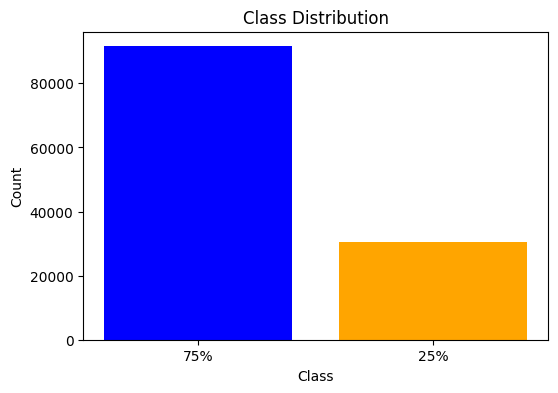

In [5]:
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, [height_1, height_2], color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(class_counts.index, ['75%', '25%'], rotation=0)  # Set x-axis ticks to the desired ratio labels
plt.show()

In [6]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
122026,76408,1.153168,0.479407,0.314896,1.243811,-0.007747,-0.760372,0.443770,-0.200864,-0.408447,...,-0.323482,-0.924932,0.195446,0.367543,0.303080,-0.720368,0.021666,0.028146,18.40,0
122027,76408,1.182257,-0.612610,1.370148,0.471155,-1.102223,0.760349,-1.060528,0.246510,1.752594,...,-0.148466,0.108189,-0.168645,-0.299281,0.418151,1.175795,0.011463,0.014747,23.53,0
122028,76409,1.114535,-0.169285,0.819799,-0.002236,-0.701896,-0.234576,-0.401155,0.121827,0.049431,...,-0.082207,-0.289343,0.171241,0.267527,-0.117185,0.784617,-0.051578,0.008306,29.63,0
122029,76409,1.215483,0.081298,0.450790,0.587680,-0.442346,-0.562772,-0.128022,0.027022,0.292149,...,-0.248689,-0.765653,0.185846,0.023478,0.088353,0.129768,-0.023441,0.012091,1.98,0
122030,76409,1.100759,-0.885389,1.693873,0.519650,-1.417428,1.418838,-1.658357,0.647540,-0.007987,...,-0.080713,0.542830,0.018620,-0.302385,0.174412,-0.145532,0.152438,0.030300,10.99,0


In [8]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122031 entries, 0 to 122030
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    122031 non-null  int64  
 1   V1      122031 non-null  float64
 2   V2      122031 non-null  float64
 3   V3      122031 non-null  float64
 4   V4      122031 non-null  float64
 5   V5      122031 non-null  float64
 6   V6      122031 non-null  float64
 7   V7      122031 non-null  float64
 8   V8      122031 non-null  float64
 9   V9      122031 non-null  float64
 10  V10     122031 non-null  float64
 11  V11     122031 non-null  float64
 12  V12     122031 non-null  float64
 13  V13     122031 non-null  float64
 14  V14     122031 non-null  float64
 15  V15     122031 non-null  float64
 16  V16     122031 non-null  float64
 17  V17     122031 non-null  float64
 18  V18     122031 non-null  float64
 19  V19     122031 non-null  float64
 20  V20     122031 non-null  float64
 21  V21     12

In [9]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    121782
1       249
Name: count, dtype: int64

0 --> Normal Transaction

1 --> fraudulent transaction

In [11]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [12]:
print(legit.shape)
print(fraud.shape)

(121782, 31)
(249, 31)


In [13]:
# statistical measures of the data
legit.Amount.describe()

count    121782.000000
mean         94.069239
std         255.464160
min           0.000000
25%           6.850000
50%          24.990000
75%          84.590000
max       19656.530000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     249.000000
mean      119.180482
std       251.160611
min         0.000000
25%         1.000000
50%        11.390000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [15]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,47776.739945,-0.242329,-0.015134,0.694478,0.143815,-0.275218,0.091110,-0.101666,0.057927,-0.075457,...,0.042771,-0.038312,-0.113758,-0.035130,0.011846,0.130306,0.027618,-0.000335,0.001736,94.069239
1,40280.433735,-5.846600,4.076891,-7.453278,4.641314,-4.167167,-1.511639,-6.201243,1.559279,-2.696182,...,0.259111,1.324185,-0.314840,-0.103567,-0.108411,0.199329,0.074713,0.522683,0.076517,119.180482


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [16]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [17]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [18]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42732,41222,-0.798318,0.274479,0.999705,0.745266,1.779616,-0.700819,1.579767,-1.006390,-0.351450,...,-0.134193,0.433417,0.077362,-0.430234,0.251328,-0.306781,-0.548793,-0.521128,1.59,0
108704,71031,1.182456,0.326228,0.294534,2.324283,0.522386,1.074643,-0.102082,0.207097,-0.221375,...,-0.329943,-0.823911,-0.085429,-1.340271,0.513033,-0.046869,0.020056,0.011023,19.77,0
25835,33785,1.245292,-0.594493,0.275982,-0.578346,-0.920599,-0.865570,-0.321689,-0.217249,-1.007295,...,0.303333,0.736260,-0.102900,0.452253,0.510125,-0.114928,0.003129,0.021850,70.75,0
80046,58309,-0.925531,0.876656,1.328967,-0.009920,0.051637,-0.054125,0.415637,0.147331,0.178512,...,-0.018497,0.326051,-0.151678,0.061919,-0.058481,0.361430,0.338691,0.254823,9.49,0
36000,38354,-3.225106,2.380609,2.169484,-1.825348,1.253584,-0.249697,3.376027,-2.763971,5.104243,...,-1.443924,-0.212638,-0.587524,0.278283,0.440575,-0.163672,-0.844172,-2.309725,15.00,0


In [19]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
118308,75033,-0.430330,0.985633,0.645789,0.317131,0.616332,-1.347462,1.078234,-0.161518,-0.492856,...,-0.016378,-0.207609,-0.164119,0.255280,0.454798,-0.505032,-0.039456,-0.006358,30.14,1
119714,75556,-0.734303,0.435519,-0.530866,-0.471120,0.643214,0.713832,-1.234572,-2.551412,-2.057724,...,-1.004877,1.150354,-0.152555,-1.386745,0.004716,0.219146,-0.058257,0.158048,29.95,1
119781,75581,-2.866364,2.346949,-4.053307,3.983359,-3.463186,-1.280953,-4.474764,1.216655,-2.309829,...,1.049732,0.475840,0.404480,0.282030,-0.506901,-0.371741,0.615257,0.803163,124.53,1
120505,75851,-4.793667,3.418911,-5.074445,4.035987,-3.527875,-1.923242,-5.065981,1.996885,-3.097379,...,1.168618,0.289531,-0.371888,0.144761,0.084735,-0.197431,0.328672,0.835395,99.85,1
120837,75978,-5.140723,3.568751,-5.896245,4.164720,-4.091193,-1.989960,-5.472436,2.422821,-2.909735,...,1.131130,0.118022,-0.332704,0.139941,0.324758,-0.180769,0.177810,0.661555,99.90,1


In [20]:
new_dataset['Class'].value_counts()

Class
0    492
1    249
Name: count, dtype: int64

In [21]:
new_dataset.groupby('Class').mean()
selected_features = ['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8','V9','V10','Amount']

Splitting the data into Features & Targets

In [22]:
X = new_dataset[selected_features]
Y = new_dataset['Class']

In [23]:
print(X)

         Time        V1        V2        V3        V4        V5        V6  \
42732   41222 -0.798318  0.274479  0.999705  0.745266  1.779616 -0.700819   
108704  71031  1.182456  0.326228  0.294534  2.324283  0.522386  1.074643   
25835   33785  1.245292 -0.594493  0.275982 -0.578346 -0.920599 -0.865570   
80046   58309 -0.925531  0.876656  1.328967 -0.009920  0.051637 -0.054125   
36000   38354 -3.225106  2.380609  2.169484 -1.825348  1.253584 -0.249697   
...       ...       ...       ...       ...       ...       ...       ...   
118308  75033 -0.430330  0.985633  0.645789  0.317131  0.616332 -1.347462   
119714  75556 -0.734303  0.435519 -0.530866 -0.471120  0.643214  0.713832   
119781  75581 -2.866364  2.346949 -4.053307  3.983359 -3.463186 -1.280953   
120505  75851 -4.793667  3.418911 -5.074445  4.035987 -3.527875 -1.923242   
120837  75978 -5.140723  3.568751 -5.896245  4.164720 -4.091193 -1.989960   

              V7        V8        V9       V10  Amount  
42732   1.579767 -

In [24]:
print(Y)

42732     0
108704    0
25835     0
80046     0
36000     0
         ..
118308    1
119714    1
119781    1
120505    1
120837    1
Name: Class, Length: 741, dtype: int64


Split the data into Training data & Testing Data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(741, 12) (592, 12) (149, 12)


Model Training

Logistic Regression

In [27]:
model = LogisticRegression()

In [28]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [29]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [30]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9510135135135135


In [31]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [32]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9060402684563759


In [33]:
new_data = pd.DataFrame([[0,-1.359807134,-0.072781173,2.536346738,1.378155224,-0.33832077,0.462387778,0.239598554,0.098697901,0.36378697,0.090794172,149.62]])

In [34]:
data = pd.DataFrame([[472,-3.043540624,-3.157307121,1.08846278,2.288643618,1.35980513,-1.064822523,0.325574266,-0.067793653,-0.270952836,-0.838586565,529]])

In [35]:
result = model.predict(new_data)

c:\Users\anish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [36]:
res = model.predict(data)

c:\Users\anish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
if result == 0:
    print('This is a Normal Transaction')
else:
    print('Oooops This is a Fraudulent Tranbsaction')
print('The result is :',result)

This is a Normal Transaction
The result is : [0]


In [38]:
if res == 0:
    print('This is a Normal Transaction')
else:
    print('Oooops This is a Fraudulent Transaction')
print('The result is :',res)

This is a Normal Transaction
The result is : [0]
